In [1]:
!ls

Untitled.ipynb                   kaggle_survey_2020_responses.csv
kaggle_DS_FAQ_1.ipynb


In [2]:
#노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')
plt.style.use(['ggplot']) #그래프 배경화면 

In [6]:
df_kgsurvey = pd.read_csv('kaggle_survey_2020_responses.csv')
df_kgsurvey.shape

(20037, 355)

In [12]:
df_kgsurvey.head(3)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_kgsurvey.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

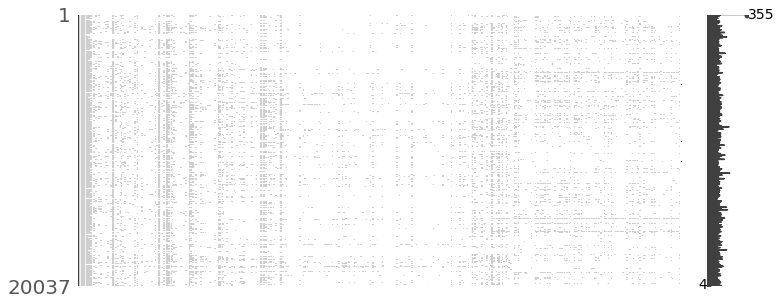

In [11]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno

msno.matrix(df_kgsurvey, figsize=(12,5))

In [15]:
df_kgsurvey.loc[0]

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [17]:
question = df_kgsurvey.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [18]:
answer = df_kgsurvey.drop([0])
answer

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [19]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20036 entries, 1 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.4+ MB


In [21]:
question.head()

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
Name: 0, dtype: object

In [22]:
question["Q1"]

'What is your age (# years)?'

In [23]:
#나이별 캐글러들 비교
Q1 = answer['Q1'].value_counts().sort_index()
Q1

18-21    3469
22-24    3786
25-29    4011
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

Text(0.5, 0, 'Age')

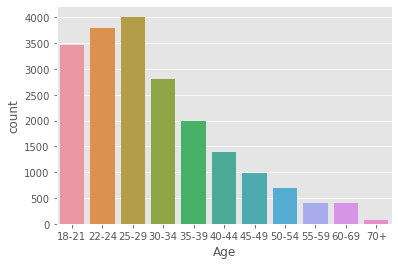

In [30]:
#나이별 캐글러들 비교
ageCount = sns.countplot(x='Q1', data=answer.sort_values("Q1"))
ageCount.set_xlabel("Age")

In [31]:
question["Q2"]

'What is your gender? - Selected Choice'

In [32]:
#성별 캐글러 비교
Q2 = answer['Q2'].value_counts().sort_index()
Q2

Man                        15789
Nonbinary                     52
Prefer not to say            263
Prefer to self-describe       54
Woman                       3878
Name: Q2, dtype: int64

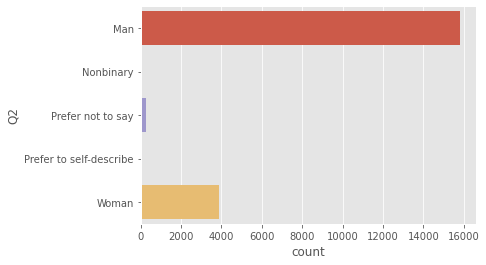

In [34]:
sns.countplot(y='Q2', data=answer.sort_values('Q2'))

In [35]:
question["Q3"]

'In which country do you currently reside?'

In [37]:
#현재 사는 지역
Q3 = answer['Q3'].value_counts().sort_index()
Q3

Argentina                                                134
Australia                                                231
Bangladesh                                               143
Belarus                                                   59
Belgium                                                   60
Brazil                                                   694
Canada                                                   301
Chile                                                     85
China                                                    474
Colombia                                                 177
Egypt                                                    179
France                                                   330
Germany                                                  404
Ghana                                                     52
Greece                                                   111
India                                                   5851
Indonesia               

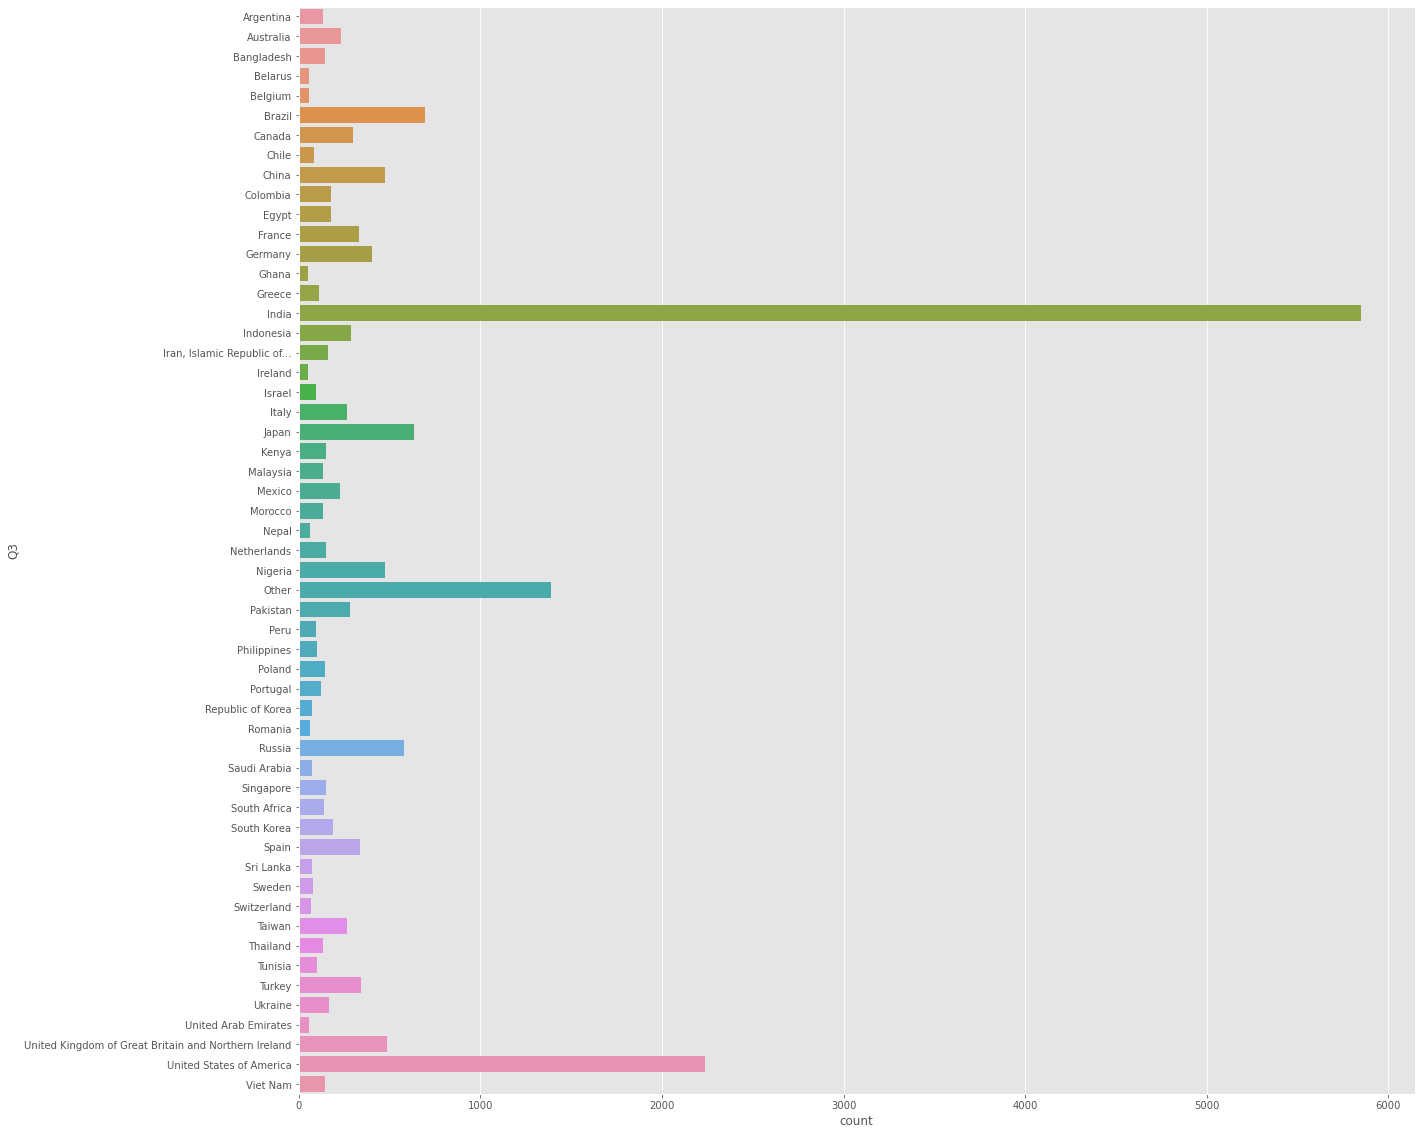

In [44]:
from matplotlib import rcParams

sns.countplot(y='Q3', data=answer.sort_values('Q3'))
rcParams['figure.figsize'] = 20,25

In [46]:
question["Q4"]
#학력

'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'

In [56]:
Q4 = answer['Q4'].value_counts().sort_index()
Q4

Bachelor’s degree                                                    6978
Doctoral degree                                                      2302
I prefer not to answer                                                399
Master’s degree                                                      7859
No formal education past high school                                  240
Professional degree                                                   699
Some college/university study without earning a bachelor’s degree    1092
Name: Q4, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

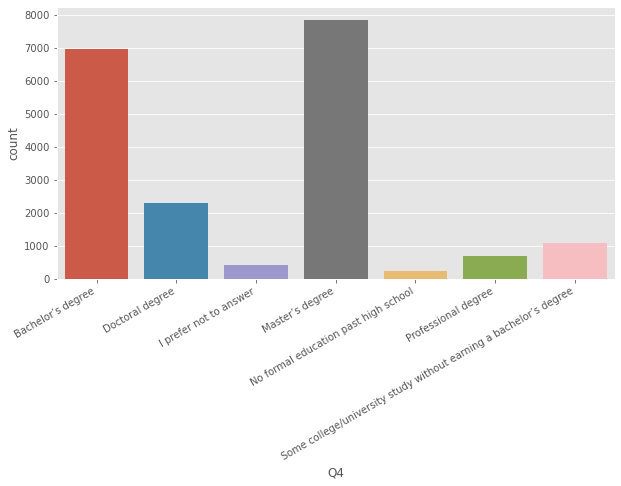

In [54]:
sns.countplot(x='Q4', data=answer.sort_values('Q4'))
rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=30, ha='right')

In [55]:
question["Q5"]

'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'

In [58]:
#직업군
Q5 = answer['Q5'].value_counts().sort_index()
Q5

Business Analyst              798
Currently not employed       1652
DBA/Database Engineer         125
Data Analyst                 1475
Data Engineer                 437
Data Scientist               2676
Machine Learning Engineer    1082
Other                        1737
Product/Project Manager       692
Research Scientist           1174
Software Engineer            1968
Statistician                  290
Student                      5171
Name: Q5, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

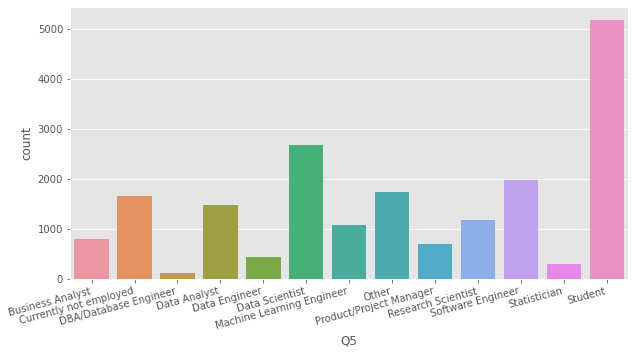

In [60]:
sns.countplot(x='Q5', data=answer.sort_values('Q5'))
plt.xticks(rotation=15, ha='right')

In [66]:
question['Q6']

'For how many years have you been writing code and/or programming?'

In [70]:
#경력
Q6 = answer['Q6'].value_counts().sort_index()
Q6

1-2 years                    4505
10-20 years                  1751
20+ years                    1329
3-5 years                    4546
5-10 years                   2552
< 1 years                    3313
I have never written code    1124
Name: Q6, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

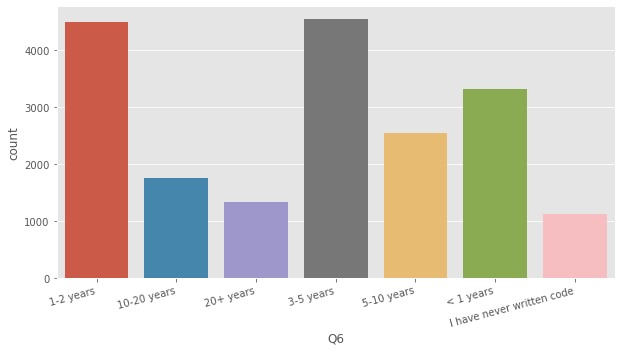

In [72]:
sns.countplot(x='Q6', data=answer.sort_values('Q6'))
plt.xticks(rotation=15, ha='right')